##Estadística Aplicada

Paulina Quiroz Sánchez  1723927

Grupo 41

In [5]:
#Librerías Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
pip install pmdarima

In [7]:
#especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict

#arima
from statsmodels.tsa.arima.model import ARIMA

##
import pmdarima as pm


1.Descargar  la  base  de  datos con  base  en  el  video  adjunto,  se  debe  elegir  un periodo y en la notebook se debe justificar el periodo elegido.

In [8]:
#Cargar base de datos
indicadores = pd.read_excel('/content/Indicadores.xls')

In [9]:
indicadores.head()

,Periodos,IMCMI_SA
0,1993/01,52.535712
1,1993/02,53.260021
2,1993/03,53.921865
3,1993/04,53.102741
4,1993/05,54.042567


In [10]:
indicadores.dtypes

Periodos     object
IMCMI_SA    float64
dtype: object

In [11]:
indicadores.isnull().sum()

Periodos    0
IMCMI_SA    0
dtype: int64

In [12]:
##convertir en tiempo
indicadores['Periodos']=pd.to_datetime(indicadores['Periodos'], format='%Y/%m')

In [13]:
indicadores = indicadores.set_index('Periodos')
indicadores = indicadores.asfreq('MS')

In [14]:
indicadores.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='Periodos', length=367, freq='MS')

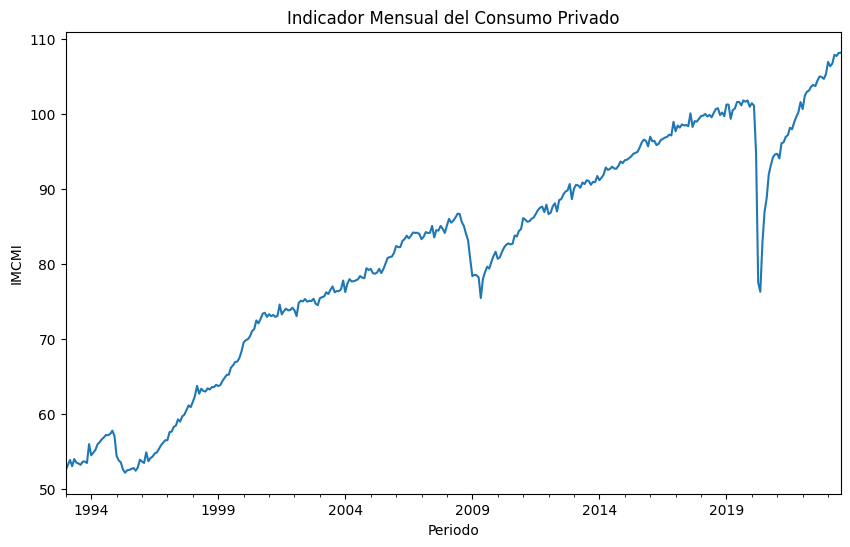

In [15]:
indicadores['IMCMI_SA'].plot(figsize=(10,6))
plt.xlabel('Periodo')
plt.ylabel('IMCMI')
plt.title('Indicador Mensual del Consumo Privado')
plt.show();

In [16]:
prueba_adf=adfuller(indicadores['IMCMI_SA'])
pvalue=prueba_adf[1]
pvalue.round(2)

0.8

No rechazmos H0, significa que el IMCP es un proceso no estacionario



In [17]:
#1eras diferencias

indicadores['indicadores_diff']=indicadores['IMCMI_SA'].diff()

<Axes: xlabel='Periodos'>

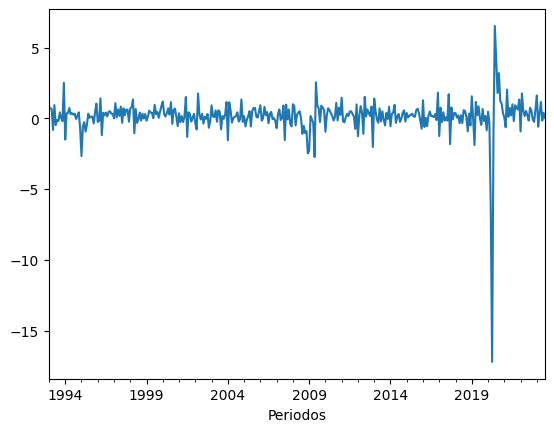

In [18]:
indicadores['indicadores_diff'].plot()

In [19]:
prueba_adf1=adfuller(indicadores['indicadores_diff'].dropna())
pvalue1=prueba_adf1[1]
pvalue1.round(2)

0.0

Rechazamos H0, las primeras diferencias son un proceso estacionario

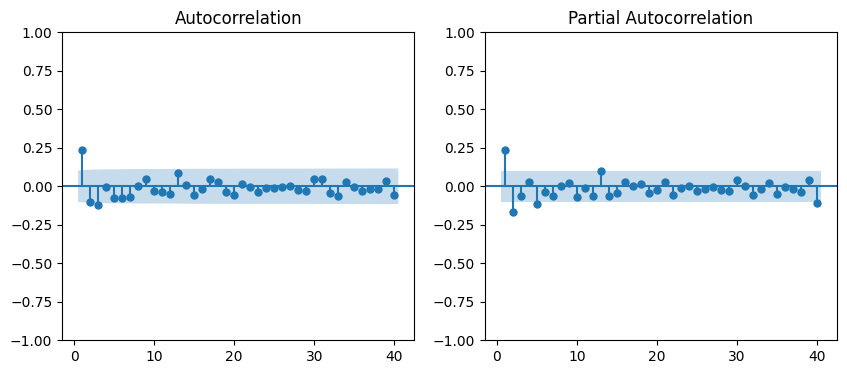

In [20]:
#que proceso estacionario es? verificamos con una grafica

ig, ax=plt.subplots(1,2, figsize=(10,4))

#1er
plot_acf(indicadores['indicadores_diff'].dropna(),zero=False, lags=40, ax=ax[0])

#2do
plot_pacf(indicadores['indicadores_diff'].dropna(),zero=False, lags=40, ax=ax[1])
plt.show()

#nos ayudan para observar si la serie tiene un componente estacional - subidas o caidas que repiten de la misma frecuencia

EL IMCP es una serie sin componente estacional.

In [21]:
## determinar el orden del proceso
arimaorder_aic=pm.auto_arima(indicadores['IMCMI_SA'],
                start_p=1,start_q=1,
                max_p=7, max_q=7,
                information_criterion='aic'
                )
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)>

In [22]:
help(pm.auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [23]:
# vamos a estimar varios modelos y que se guarde el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(indicadores['IMCMI_SA'], order=(ar, 1, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4
AR: 2, MA: 5
AR: 2, MA: 6
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 3
AR: 3, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5
AR: 3, MA: 6


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 4
AR: 4, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 6


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3
AR: 5, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
ic.sort_values('AIC').head()

,,AIC,BIC
AR,MA,,
4,2,1186.764636,1214.083070
3,4,1190.380538,1221.601605
0,3,1192.586260,1208.196793
1,3,1193.760220,1213.273387
2,0,1194.232781,1205.940681


indicadores ARIMA (4,1,2)

In [25]:
ic.sort_values('BIC').head()

,,AIC,BIC
AR,MA,,
0,1,1196.089478,1203.894745
2,0,1194.232781,1205.940681
0,3,1192.586260,1208.196793
1,0,1201.199117,1209.004383
0,2,1197.936567,1209.644467


indicadores ARIMA (0,1,1)

In [33]:
model = ARIMA(indicadores['IMCMI_SA'], order=(0,1,1))
results=model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:               IMCMI_SA   No. Observations:                  367
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -596.045
Date:                Fri, 03 Nov 2023   AIC                           1196.089
Time:                        01:43:03   BIC                           1203.895
Sample:                    01-01-1993   HQIC                          1199.191
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2858      0.025     11.572      0.000       0.237       0.334
sigma2         1.5204      0.035     43.912      0.000       1.453       1.588
Ljung-Box (L1) (Q):                   0.07   Jarque-

In [34]:
forecast = results.get_forecast(steps=3)
forecast_mean = forecast.predicted_mean
forecast_ci=forecast.conf_int()

In [35]:
inicio = '2023-08-01'
fin = '2023-10-01'

In [36]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]

In [37]:
df_forecast = pd.DataFrame({
    'pronostico':pronostico_valor,
    'limite inferior': pronostico_intervalos['lower IMCMI_SA'],
    'limite superior': pronostico_intervalos['upper IMCMI_SA']
})

In [38]:
df_forecast

,pronostico,limite inferior,limite superior
2023-08-01,108.179016,105.762312,110.595720
2023-09-01,108.179016,104.242490,112.115542
2023-10-01,108.179016,103.163837,113.194195


In [39]:
print(f'Pronosticamos que el indicador comienza en {df_forecast.iloc[0,0].round(2)}\n pero puede estar entre {df_forecast.iloc[0,1].round(2)} y {df_forecast.iloc[0,2].round(2)}')


Pronosticamos que el indicador comienza en 108.18
 pero puede estar entre 105.76 y 110.6
